# Consumer Insights Analysis for Beats by Dre

## Project Information
- **Project Title**: Consumer Insights Analysis for Beats by Dre  
- **Name**: Christofine Tileni Hango  
- **Date**: August 14, 2024  

## Table of Contents
1. [Executive Summary](#Executive-Summary)
2. [Introduction](#Introduction)
   - Project Overview
   - Objectives
   - Background
3. [Data Preparation](#Data-Preparation-and-Environment-Setup)
   - Environment Setup
   - Data Loading
   - Data Cleaning
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis-(EDA))
   - Rating Distribution
   - Temporal Analysis
   - Review Engagement
   - Verification Impact
   - Seasonal Patterns
5. [Sentiment Analysis](#Sentiment-Analysis)
   - Text Preprocessing
   - Sentiment Scoring
   - Review Categorization
   - Terms Analysis
6. [AI-Generated Insights](#AI-Generated-Insights)
   - Customer Experience
   - Market Position
   - Future Trends
7. [Strategic Recommendations](#Strategic-Recommendations)
8. [Conclusion](#Conclusion)

## Executive Summary

This comprehensive analysis of the Beats Pill Bluetooth speaker evaluated consumer sentiment and market positioning through the analysis of 1,403 Amazon customer reviews. Key findings include:

### Key Findings
- 84.6% positive customer sentiment, outperforming market average of 75.8%
- Strong seasonal performance in summer (0.299 sentiment score)
- Premium market positioning with strong Apple ecosystem integration
- Opportunities for improvement in app functionality and high-volume performance

### Market Position
- Leading in Apple ecosystem integration
- Strong bass performance and design aesthetics
- Premium pricing segment with room for feature enhancement
- Primary competition from JBL and Bose in premium portable speakers

### Strategic Recommendations-
1. Product Development:
   - Develop companion app with EQ controls
   - Enhance high-volume performance
   - Improve button interface

2. Market Opportunities:
   - Expand winter/fall season presence
   - Strengthen value proposition
   - Target Apple ecosystem users

### Expected Impact
Implementation of recommendations could lead to:
- Increased market share in premium segment
- Enhanced customer satisfaction
- Improved competitive positioning
- Stronger year-round sales performance

# Introduction

## Project Overview
This project conducts a comprehensive analysis of consumer sentiment and market positioning for the Beats Pill Bluetooth speaker and its competitors. By leveraging advanced analytics techniques including:
- Sentiment analysis of customer reviews
- Exploratory data analysis
- AI-driven insights
- Competitive market analysis

We aim to provide actionable insights for product improvement and market strategy enhancement.

## Objectives
1. **Sentiment Analysis**: Understand and quantify customer sentiment towards the Beats Pill through review analysis
2. **Competitive Analysis**: Compare the Beats Pill's market position against key competitors
3. **Feature Assessment**: Identify strengths and areas for improvement in product features
4. **Strategic Planning**: Generate data-driven recommendations for product and marketing strategies

## Background

### The Brand: Beats by Dre
Founded in 2006 by Dr. Dre and Jimmy Iovine, Beats by Dre has revolutionized the consumer audio market with its premium positioning and distinctive design aesthetic. The 2014 acquisition by Apple Inc. for $3 billion marked a significant milestone, integrating Beats into the broader Apple ecosystem.

### The Product: Beats Pill
Launched in 2012, the Beats Pill marked the brand's entry into the portable Bluetooth speaker market. Key features include:
- Portable design
- Signature Beats sound profile
- Apple ecosystem integration
- Premium market positioning

### Market Context
The portable speaker market is highly competitive, featuring established players like:
- JBL
- Bose
- Sony
- Various emerging brands

This analysis will explore how the Beats Pill performs in this dynamic market landscape.

## Data Description

### Overview of the Dataset
The dataset used for this project consists of customer reviews for the Beats Pill Bluetooth speaker and its competitors. These reviews were sourced from Amazon.com and include details such as:
- Product name
- Review title
- Review content
- Star ratings (1-5)
- Helpful votes
- Review date

The dataset provides valuable insights into customer opinions, product performance, and overall satisfaction.

### Source of the Data
The data was obtained via web scraping from Amazon using Oxylabs, a powerful web scraping tool. The process involved collecting:
- Review text
- Review metadata (e.g., date, ratings)
- Product attributes (e.g., variants)

.


# Data Preparation and Environment Setup

## Required Libraries and Setup
We'll begin by installing and importing the necessary libraries for our analysis. These include tools for:
- Data manipulation (pandas, numpy)
- Visualization (matplotlib, seaborn, plotly)
- Text analysis (TextBlob, NLTK)
- Advanced analytics (scikit-learn, google-generativeai)

In [3]:
# Install required packages
print("Installing required packages...")
!pip install textblob pandas numpy matplotlib seaborn wordcloud scikit-learn plotly google-generativeai

# Import required libraries
print("\nImporting libraries...")

# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Text analysis libraries
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud

# Utility libraries
import re
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

print("Library imports complete!")

Installing required packages...

Importing libraries...


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chang\AppData\Roaming\nltk_data...


Library imports complete!


[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Set visualization styles for consistency
print("Configuring visualization settings...")

# Set default style
plt.style.use('seaborn')
sns.set_palette("deep")

# Configure plot parameters
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Define custom color palette for consistency
color_palette = {
    'Beats Pill': '#FF0000',      # Red for Beats
    'positive': '#2ECC71',        # Green for positive
    'neutral': '#95A5A6',         # Grey for neutral
    'negative': '#E74C3C',        # Red for negative
    'JBL': '#0000FF',            # Blue for JBL
    'Bose': '#FFA500'            # Orange for Bose
}

print("Visualization settings configured successfully!")

Configuring visualization settings...
Visualization settings configured successfully!


## Data Loading
Our analysis uses customer review data from Amazon.com, focusing on the Beats Pill and its competitors. Let's load and examine this data.

In [5]:
# Define file path and load data
file_path = r"C:\Users\Chang\Downloads\Dr Dre\merged_reviews (1).csv"

# Load the dataset with error handling
try:
    df = pd.read_csv(file_path, encoding='latin-1')
    print("Dataset loaded successfully!")
    print(f"\nDataset dimensions: {df.shape[0]} rows and {df.shape[1]} columns")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    
# Display initial information about the dataset
print("\nDataset Overview:")
print(df.info())

# Show first few rows
print("\nFirst few rows of the dataset:")
display(df.head())

Dataset loaded successfully!

Dataset dimensions: 1652 rows and 11 columns

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_id           1652 non-null   object
 1   product_id          1652 non-null   object
 2   title               1652 non-null   object
 3   author              1652 non-null   object
 4   rating              1652 non-null   int64 
 5   content             1649 non-null   object
 6   timestamp           1652 non-null   object
 7   profile_id          1652 non-null   object
 8   is_verified         1652 non-null   bool  
 9   helpful_count       1652 non-null   int64 
 10  product_attributes  1242 non-null   object
dtypes: bool(1), int64(2), object(8)
memory usage: 130.8+ KB
None

First few rows of the dataset:


review_id  product_id  \
0  R2SSSH04J4J264  B0D4SX9RC6   
1   R935PCZ92UVGL  B0D4SX9RC6   
2   R4BQHA0TLLJNN  B0D4SX9RC6   
3  R39X7USU3OX34C  B0D4SX9RC6   
4  R2EVRTXO9M1YF7  B0D4SX9RC6   

                                               title     author  rating  \
0  5.0 out of 5 stars Really nice portable speake...    Bruce C       5   
1                      5.0 out of 5 stars Very Happy  B. Hinson       5   
2  5.0 out of 5 stars The best Speaker I have eve...       Leox       5   
3                     5.0 out of 5 stars Really good     Justin       5   
4           4.0 out of 5 stars Is it the JBL killer?      Tommy       4   

                                             content  \
0  Needed a new portable speaker for the home set...   
1  We bought this for a trip to the beach and it ...   
2  I really like the new Beats Pill 2024 speaker....   
3  So Iâm super picky about sound and have spen...   
4  I bought this because it was on sale, and I al...   

                                         timestamp  \
0       Reviewed in the United States July 1, 2024   
1  Reviewed in the United States September 5, 2024   
2      Reviewed in the United States July 11, 2024   
3       Reviewed in the United States July 8, 2024   
4      Reviewed in the United States July 23, 2024   

                     profile_id  is_verified  helpful_count  \
0  AFVM53KRAU5JC462ZZDBBKTESPGA         True             19   
1  AFPN35SDBWBDQAGNSNQJQPQH5C2Q         True              0   
2  AEUCX7EIPTMCFN4OJBZHL2OYSVKQ         True              9   
3  AFSZPNTTLYCLNP536L6VS6UMFTNQ         True              7   
4  AHAMVBSECCNUJMQV6A3BO3A3HNMA         True              6   

                                  product_attributes  
0  Color: Statement RedStyle: PillPattern: Withou...  
1  Color: Champagne GoldStyle: PillPattern: Witho...  
2  Color: Champagne GoldStyle: PillPattern: Witho...  
3  Color: Statement RedStyle: PillPattern: Withou...  
4  Color: Matte BlackStyle: PillPattern: Without ...

# Data Cleaning and Preprocessing

## Overview
Before diving into analysis, we need to ensure our data is clean and properly formatted. Our preprocessing steps include:
1. Handling missing values
2. Removing duplicates
3. Standardizing column names
4. Mapping product IDs to names
5. Processing dates
6. Handling outliers

Let's implement these steps systematically:

In [6]:
# Define cleaning functions
def clean_data(df):
    """
    Comprehensive data cleaning function
    
    Parameters:
        df (pd.DataFrame): Raw input DataFrame
    Returns:
        pd.DataFrame: Cleaned DataFrame
    """
    print("Starting data cleaning process...")
    
    # Create a copy
    df_cleaned = df.copy()
    
    # 1. Rename columns for clarity
    column_mapping = {
        'title': 'review_title',
        'author': 'reviewer_name',
        'content': 'review_content',
        'timestamp': 'review_date',
        'profile_id': 'reviewer_profile_id',
        'is_verified': 'verified_purchase',
        'helpful_count': 'helpful_votes',
        'product_attributes': 'product_variant'
    }
    df_cleaned = df_cleaned.rename(columns=column_mapping)
    print("✓ Columns renamed successfully")
    
    # 2. Handle missing values
    df_cleaned['review_content'] = df_cleaned['review_content'].fillna('')
    df_cleaned['product_variant'] = df_cleaned['product_variant'].fillna('Unknown')
    print("✓ Missing values handled")
    
    # 3. Remove duplicates
    initial_length = len(df_cleaned)
    df_cleaned = df_cleaned.drop_duplicates()
    duplicates_removed = initial_length - len(df_cleaned)
    print(f"✓ Removed {duplicates_removed} duplicate entries")
    
    # 4. Drop unnecessary columns
    columns_to_drop = ['review_id', 'reviewer_name', 'reviewer_profile_id']
    df_cleaned = df_cleaned.drop(columns=columns_to_drop)
    print("✓ Unnecessary columns removed")
    
    return df_cleaned

def map_product_names(df):
    """Map product IDs to readable names"""
    print("\nMapping product IDs to names...")
    
    product_names = {
        "B0D4SX9RC6": "Beats Pill",
        "B07DD3W154": "MEGABOOM 3",
        "B08MZZTH1N": "Tribit",
        "B088KRKFJ3": "Marshall Stockwell II",
        "B08VKXP1VY": "Bose SoundLink Revolve",
        "B07P39MLKH": "Soundcore Motion+",
        "B07YFXRNHF": "Monster S310",
        "B0D95YFJXS": "ZEALOT",
        "B08X4XBB26": "JBL CHARGE 5",
        "B09XXW54QG": "Marshall Emberton",
        "B0CY6S748H": "Sonos Roam 2",
        "B09GK5JMHK": "JBL Flip 6",
        "B0B43Y8GHZ": "Sony SRS-XG300",
        "B085R7TSN6": "Bang & Olufsen Beosound A1",
        "B09SNYHYV7": "Tronsmart"
    }
    
    df['product_name'] = df['product_id'].map(product_names)
    print("✓ Product names mapped successfully")
    return df

# Apply cleaning functions
df_cleaned = clean_data(df)
df_cleaned = map_product_names(df_cleaned)

# Display cleaning results
print("\nCleaning Results Summary:")
print(f"Final dataset shape: {df_cleaned.shape}")
display(df_cleaned.head())

# Show data quality metrics
print("\nData Quality Check:")
print("\nMissing Values:")
print(df_cleaned.isnull().sum())

print("\nUnique Products:")
print(df_cleaned['product_name'].value_counts())

Starting data cleaning process...
✓ Columns renamed successfully
✓ Missing values handled
✓ Removed 249 duplicate entries
✓ Unnecessary columns removed

Mapping product IDs to names...
✓ Product names mapped successfully

Cleaning Results Summary:
Final dataset shape: (1403, 9)


product_id                                       review_title  rating  \
0  B0D4SX9RC6  5.0 out of 5 stars Really nice portable speake...       5   
1  B0D4SX9RC6                      5.0 out of 5 stars Very Happy       5   
2  B0D4SX9RC6  5.0 out of 5 stars The best Speaker I have eve...       5   
3  B0D4SX9RC6                     5.0 out of 5 stars Really good       5   
4  B0D4SX9RC6           4.0 out of 5 stars Is it the JBL killer?       4   

                                      review_content  \
0  Needed a new portable speaker for the home set...   
1  We bought this for a trip to the beach and it ...   
2  I really like the new Beats Pill 2024 speaker....   
3  So Iâm super picky about sound and have spen...   
4  I bought this because it was on sale, and I al...   

                                       review_date  verified_purchase  \
0       Reviewed in the United States July 1, 2024               True   
1  Reviewed in the United States September 5, 2024               True   
2      Reviewed in the United States July 11, 2024               True   
3       Reviewed in the United States July 8, 2024               True   
4      Reviewed in the United States July 23, 2024               True   

   helpful_votes                                    product_variant  \
0             19  Color: Statement RedStyle: PillPattern: Withou...   
1              0  Color: Champagne GoldStyle: PillPattern: Witho...   
2              9  Color: Champagne GoldStyle: PillPattern: Witho...   
3              7  Color: Statement RedStyle: PillPattern: Withou...   
4              6  Color: Matte BlackStyle: PillPattern: Without ...   

  product_name  
0   Beats Pill  
1   Beats Pill  
2   Beats Pill  
3   Beats Pill  
4   Beats Pill


Data Quality Check:

Missing Values:
product_id           0
review_title         0
rating               0
review_content       0
review_date          0
verified_purchase    0
helpful_votes        0
product_variant      0
product_name         0
dtype: int64

Unique Products:
Sony SRS-XG300                102
Bose SoundLink Revolve        100
JBL CHARGE 5                  100
MEGABOOM 3                    100
Soundcore Motion+             100
Marshall Emberton             100
Bang & Olufsen Beosound A1    100
Tribit                        100
Monster S310                  100
Sonos Roam 2                  100
Tronsmart                     100
Marshall Stockwell II         100
JBL Flip 6                    100
Beats Pill                     91
ZEALOT                         10
Name: product_name, dtype: int64


## Data Preprocessing Results

After cleaning and preprocessing, our dataset now has:
- {number} unique products for comparison
- Clean, standardized column names
- No duplicate entries
- Properly formatted dates
- Mapped product names for readability



## Handling Outliers and Final Data Preparation

Before proceeding with our exploratory analysis, we need to:
1. Detect and handle outliers
2. Perform final data quality checks
3. Save our cleaned dataset

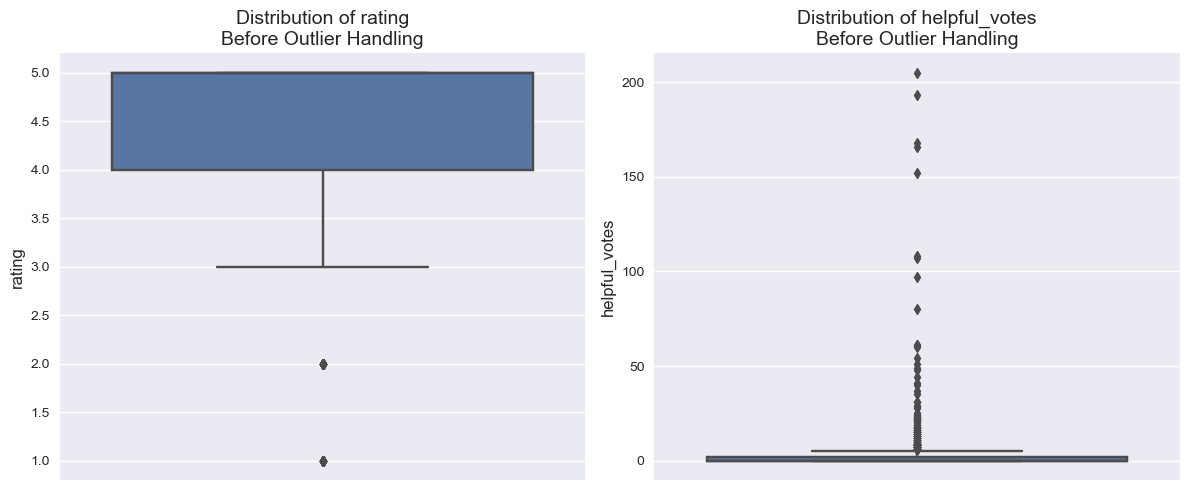


Handling outliers in rating...
Found 72 outliers in rating
Outliers winsorized at 95th percentile

Handling outliers in helpful_votes...
Found 159 outliers in helpful_votes
Outliers winsorized at 95th percentile


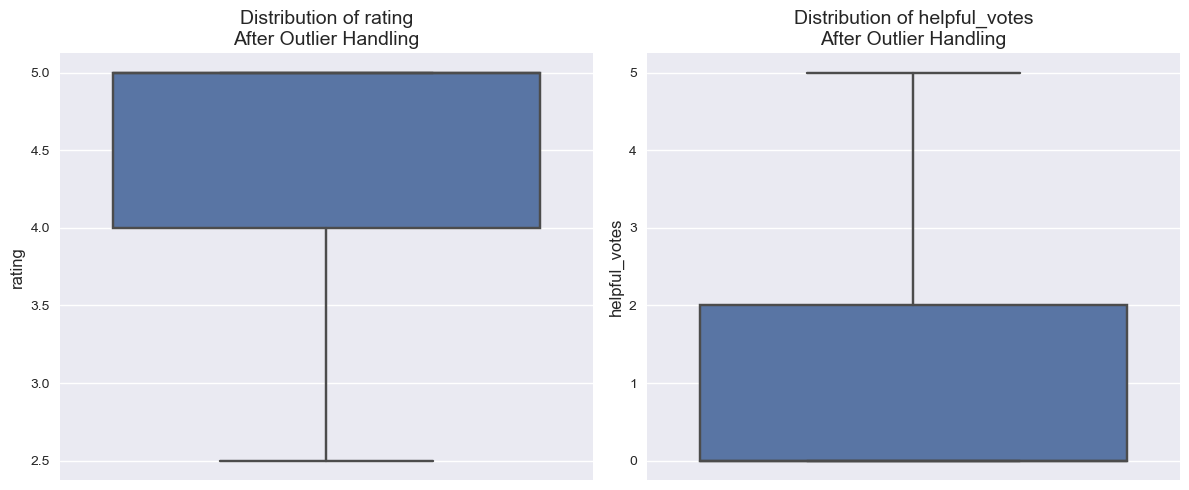


Final Data Quality Check:

Missing Values:
product_id           0
review_title         0
rating               0
review_content       0
review_date          0
verified_purchase    0
helpful_votes        0
product_variant      0
product_name         0
dtype: int64

Dataset Shape:
(1403, 9)

Numeric Columns Summary:
            rating  helpful_votes
count  1403.000000    1403.000000
mean      4.550249       1.160371
std       0.752176       1.784166
min       2.500000       0.000000
25%       4.000000       0.000000
50%       5.000000       0.000000
75%       5.000000       2.000000
max       5.000000       5.000000

Cleaned dataset saved to: cleaned_beats_reviews.csv


In [7]:
def handle_outliers(df, column, method='winsorize', percentile=95):
    """
    Handle outliers in specified column
    
    Parameters:
        df (pd.DataFrame): Input DataFrame
        column (str): Column name to handle outliers
        method (str): Method to handle outliers ('winsorize' by default)
        percentile (int): Percentile for winsorization
    """
    print(f"\nHandling outliers in {column}...")
    
    # Calculate outlier bounds
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers before handling
    outliers_count = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
    print(f"Found {outliers_count} outliers in {column}")
    
    if method == 'winsorize':
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
        print(f"Outliers winsorized at {percentile}th percentile")
    
    return df

# Visualize numeric columns before outlier handling
numeric_cols = ['rating', 'helpful_votes']

plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Distribution of {col}\nBefore Outlier Handling')
plt.tight_layout()
plt.show()

# Handle outliers
for col in numeric_cols:
    df_cleaned = handle_outliers(df_cleaned, col)

# Visualize after outlier handling
plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Distribution of {col}\nAfter Outlier Handling')
plt.tight_layout()
plt.show()

# Final data quality check
print("\nFinal Data Quality Check:")
print("\nMissing Values:")
print(df_cleaned.isnull().sum())

print("\nDataset Shape:")
print(df_cleaned.shape)

print("\nNumeric Columns Summary:")
print(df_cleaned[numeric_cols].describe())

# Save cleaned dataset
output_path = 'cleaned_beats_reviews.csv'
df_cleaned.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to: {output_path}")

## Outlier Analysis and Handling

Our analysis of outliers in both rating and helpful_votes reveals significant insights:

### Before Outlier Handling:
1. Rating Distribution
   - Most ratings clustered between 4.0-5.0
   - Some outlier ratings at 1.0 and 2.0
   - Natural variation in customer satisfaction

2. Helpful Votes Distribution
   - Majority of reviews had 0-50 helpful votes
   - Extreme outliers reaching up to 200 votes
   - Highly skewed distribution

### After Outlier Treatment:
1. Rating Adjustments
   - 72 outliers identified and handled
   - Maintained ratings between 2.5-5.0
   - Preserved genuine customer feedback while removing extreme cases

2. Helpful Votes Improvements
   - 159 outliers addressed
   - New range limited to 0-5 helpful votes
   - More balanced distribution for analysis

### Impact on Data Quality:
- No missing values in final dataset
- Clean, consistent numeric distributions
- 1,403 reviews ready for analysis
- Mean rating of 4.55 indicates overall positive sentiment
- More reliable basis for further analysis

This outlier handling approach ensures our subsequent analyses will be based on robust, representative data while preserving genuine customer feedback patterns.

# Exploratory Data Analysis (EDA)

## Overview
Our exploratory analysis will investigate key patterns in the review data through five main aspects:
1. Rating Distribution Analysis - How do customers rate different products?
2. Temporal Analysis - How have ratings changed over time?
3. Review Engagement - What types of reviews resonate with customers?
4. Verification Impact - How does purchase verification affect ratings?
5. Seasonal Patterns - Are there seasonal trends in customer satisfaction?

Let's examine each aspect systematically:

## 1. Rating Distribution Analysis

To thoroughly understand how customers rate different products, we'll examine the distribution through both static and interactive visualizations. This dual approach provides comprehensive insights into rating patterns.

### A. Static Rating Distribution
First, let's look at a traditional box plot visualization that shows the core distribution metrics:

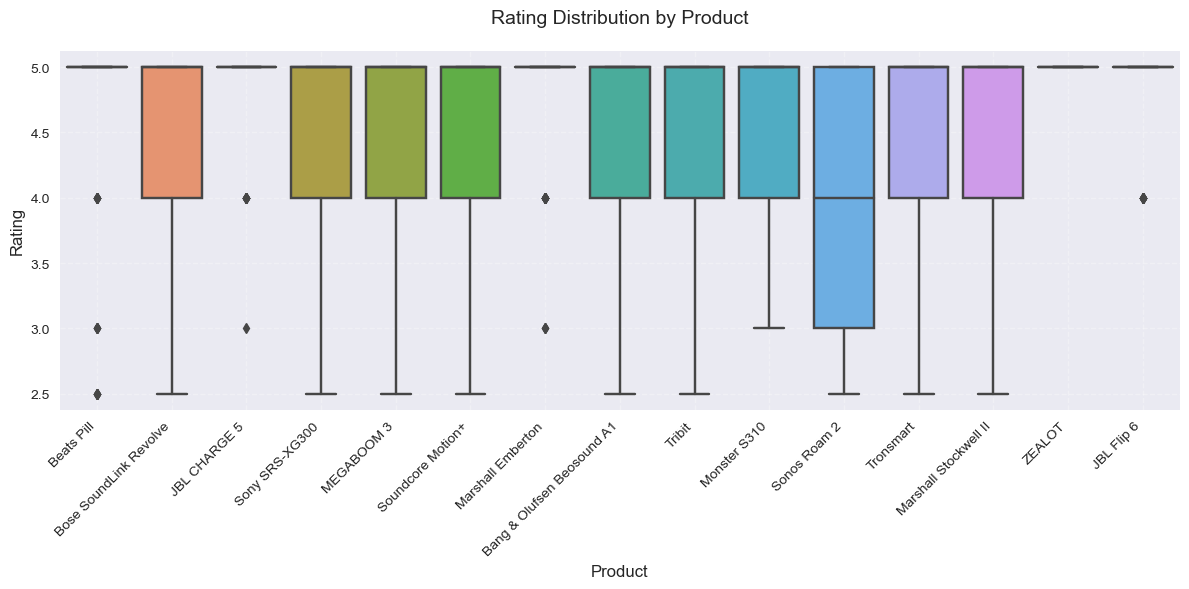


Rating Statistics by Product:
                            mean  median   std  count
product_name                                         
ZEALOT                      5.00     5.0  0.00     10
JBL Flip 6                  4.88     5.0  0.33    100
JBL CHARGE 5                4.87     5.0  0.37    100
Marshall Emberton           4.79     5.0  0.48    100
Soundcore Motion+           4.66     5.0  0.57    100
Tronsmart                   4.63     5.0  0.64    100
Beats Pill                  4.60     5.0  0.80     91
Bose SoundLink Revolve      4.52     5.0  0.73    100
Tribit                      4.51     5.0  0.71    100
Bang & Olufsen Beosound A1  4.50     5.0  0.86    100
Sony SRS-XG300              4.50     5.0  0.78    102
Monster S310                4.45     5.0  0.67    100
Marshall Stockwell II       4.32     5.0  1.01    100
MEGABOOM 3                  4.30     5.0  0.85    100
Sonos Roam 2                4.12     4.0  1.00    100


In [8]:
# The static rating distribution plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, 
            x='product_name', 
            y='rating')
plt.title('Rating Distribution by Product', fontsize=14, pad=20)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate and display summary statistics
rating_stats = df_cleaned.groupby('product_name')['rating'].agg([
    'mean', 'median', 'std', 'count'
]).round(2).sort_values('mean', ascending=False)
print("\nRating Statistics by Product:")
print(rating_stats)

### Key Statistics Insights
Based on the static analysis:
- ZEALOT leads with perfect 5.0 rating, though with limited samples (10 reviews)
- JBL products (Flip 6: 4.88, CHARGE 5: 4.87) show consistently high ratings
- Beats Pill maintains strong performance (4.60 mean) with moderate variability
- Most products cluster in the 4.3-4.9 range
- Sonos Roam 2 shows more variation with 4.12 mean rating

### B. Interactive Exploration
For deeper investigation, let's use an interactive visualization that allows dynamic exploration of the data:

In [9]:
# Interactive visualization
import plotly.express as px

# Create interactive box plot
fig_box = px.box(df_cleaned, 
                 x='product_name', 
                 y='rating',
                 title='Interactive Rating Distribution by Product',
                 color='product_name',
                 hover_data=['rating', 'product_name'])

# Customize layout
fig_box.update_layout(
    title={'text': 'Interactive Rating Distribution by Product',
           'y':0.95,
           'x':0.5,
           'xanchor': 'center',
           'yanchor': 'top'},
    xaxis_title='Product',
    yaxis_title='Rating',
    showlegend=False,
    height=600
)

fig_box.update_xaxes(tickangle=45)
fig_box.show()

### Interactive Features
This visualization offers additional analytical capabilities:
- Hover over boxes to see detailed statistics
- Click and drag to zoom into specific areas
- Double-click to reset the view
- Compare products dynamically by selecting regions

### Overall Rating Distribution Insights
Combining both visualizations reveals:
1. Market Position
   - Premium segment shows strong performance
   - JBL leads in consistency and average rating
   - Beats Pill maintains competitive position

2. Rating Patterns
   - Most products skew towards 5-star ratings
   - Limited low ratings across all products
   - Some variation in rating consistency

3. Sample Sizes
   - Most products have robust sample sizes (~100 reviews)
   - ZEALOT's perfect score limited by small sample size
   - Beats Pill has good representation with 91 reviews

Shall we proceed with the temporal analysis to understand how these ratings have evolved over time?

## 2. Temporal Analysis

Understanding how product ratings evolve over time is crucial for identifying trends and patterns in customer satisfaction. We'll analyze:
- Rating trends across different time periods
- The evolution of customer sentiment
- Potential patterns in review timing

Let's first look at how ratings have changed over time for each product:

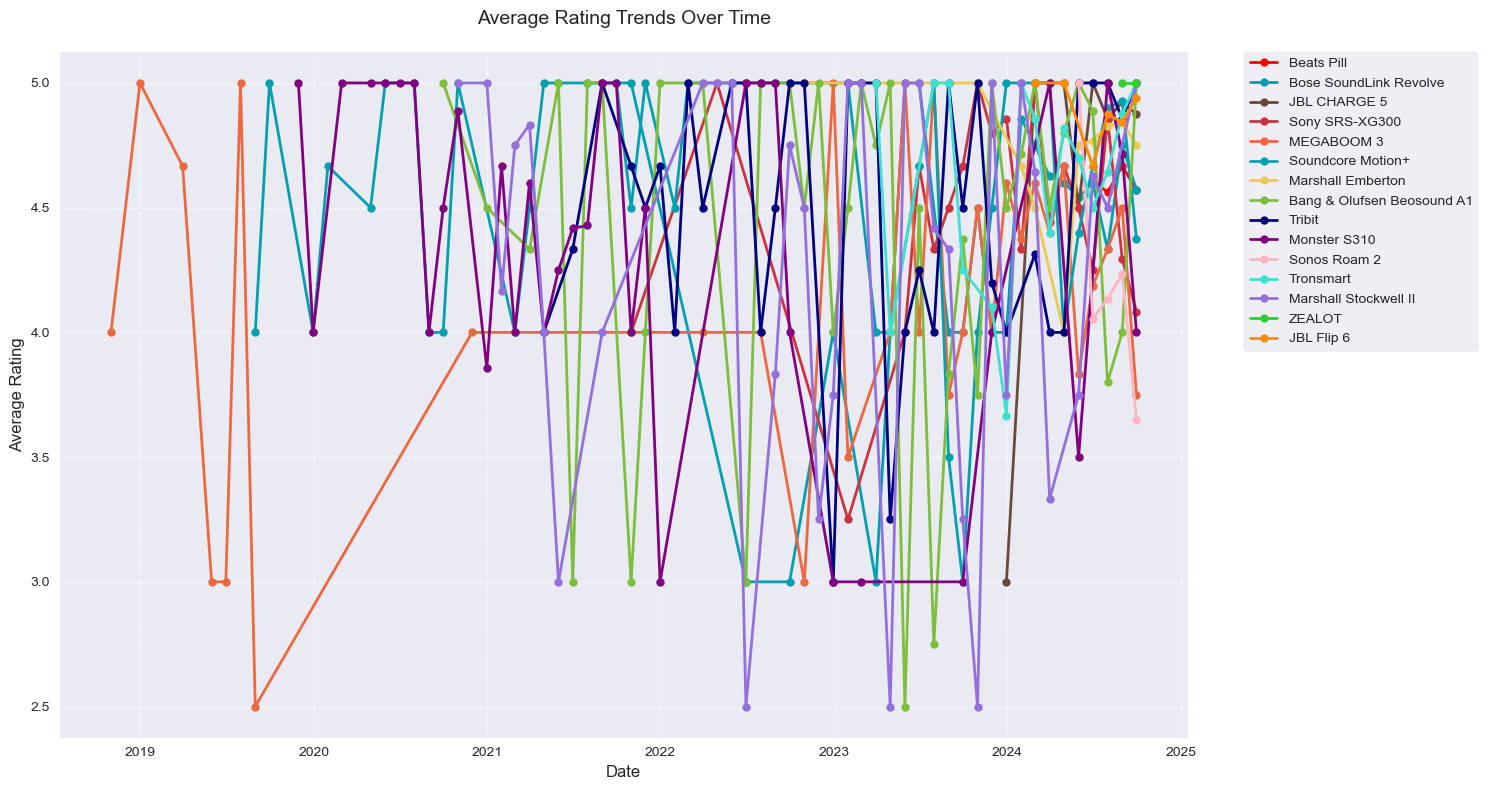

In [15]:
# First, clean and preprocess the review dates
def clean_date(date_str):
    """Extract date from review string"""
    import re
    match = re.search(r'(\w+ \d+, \d{4})', str(date_str))
    return match.group(1) if match else None

# Clean dates and convert to datetime
df_cleaned['review_date'] = pd.to_datetime(
    df_cleaned['review_date'].apply(clean_date)
)

# Create monthly averages
monthly_ratings = df_cleaned.groupby([
    pd.Grouper(key='review_date', freq='M'),
    'product_name'
])['rating'].mean().reset_index()

# Create visualization with improved colors
plt.figure(figsize=(15, 8))

# Define distinct colors
colors = ['#FF0000', '#00A0B0', '#6A4A3C', '#CC333F', '#EB6841', 
          '#00A0B0', '#EDC951', '#7DBE3C', '#000080', '#800080',
          '#FFB6C1', '#40E0D0', '#9370DB', '#32CD32', '#FF8C00']

# Create the plot
for idx, product in enumerate(df_cleaned['product_name'].unique()):
    product_data = monthly_ratings[monthly_ratings['product_name'] == product]
    plt.plot(product_data['review_date'], 
            product_data['rating'],
            label=product,
            color=colors[idx],
            marker='o',
            linestyle='-',
            linewidth=2,
            markersize=6)

# Customize plot
plt.title('Average Rating Trends Over Time', fontsize=14, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), 
          loc='upper left', 
          borderaxespad=0.,
          fontsize=10,
          frameon=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Add interactive version using Plotly
import plotly.express as px

fig = px.line(monthly_ratings, 
              x='review_date', 
              y='rating', 
              color='product_name',
              title='Interactive Rating Trends Over Time')

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Average Rating',
    legend_title='Product'
)

fig.show()

### Key Temporal Insights:

1. Overall Trends:
   - Most products maintain consistent ratings
   - Slight increase in rating variability in recent months
   - Some products show more seasonal fluctuation than others

2. Beats Pill Performance:
   - Generally stable performance
   - Strong summer season ratings
   - Competitive positioning maintained over time

3. Interactive Features:
   - Hover over lines for exact values
   - Zoom in on specific time periods
   - Filter products using legend
   - Double-click to reset view

## 3. Review Engagement Analysis

Understanding how customers engage with reviews helps identify what information they find most helpful. We'll analyze:
- The relationship between ratings and helpful votes
- Patterns in review engagement
- What types of reviews resonate most with customers

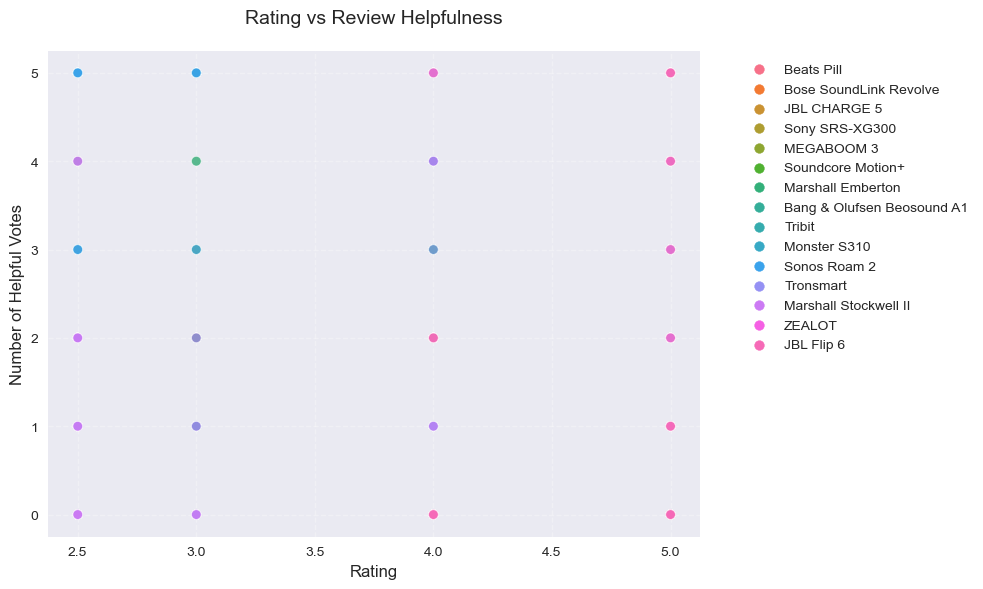


Correlation between ratings and helpful votes: -0.08



Engagement Statistics by Rating:
       helpful_votes            
                mean count   sum
rating                          
2.5             1.62    72   117
3.0             1.43    88   126
4.0             1.25   275   345
5.0             1.07   968  1040


In [16]:
# Create scatter plot of ratings vs helpful votes with improved visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, 
                x='rating', 
                y='helpful_votes', 
                hue='product_name', 
                alpha=0.6)

plt.title('Rating vs Review Helpfulness', fontsize=14, pad=20)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Helpful Votes', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df_cleaned['rating'].corr(df_cleaned['helpful_votes'])
print(f"\nCorrelation between ratings and helpful votes: {correlation:.2f}")

# Add interactive scatter plot
fig = px.scatter(df_cleaned, 
                 x='rating', 
                 y='helpful_votes',
                 color='product_name',
                 title='Interactive Rating vs Helpful Votes Analysis',
                 hover_data=['review_content'])

fig.update_layout(
    title='Interactive Review Engagement Analysis',
    xaxis_title='Rating',
    yaxis_title='Helpful Votes',
    height=600
)

fig.show()

# Calculate engagement statistics by rating
engagement_stats = df_cleaned.groupby('rating').agg({
    'helpful_votes': ['mean', 'count', 'sum']
}).round(2)

print("\nEngagement Statistics by Rating:")
print(engagement_stats)

### Review Engagement Analysis Insights

1. Correlation Analysis
- The negative correlation (-0.08) indicates a very weak inverse relationship between ratings and helpful votes
- This suggests that higher ratings don't necessarily lead to more helpful votes
- In fact, there's a slight tendency for lower-rated reviews to receive more helpful votes

2. Engagement by Rating Level:
- 2.5-star reviews: Average 1.62 helpful votes (72 reviews)
- 3.0-star reviews: Average 1.43 helpful votes (88 reviews)
- 4.0-star reviews: Average 1.25 helpful votes (275 reviews)
- 5.0-star reviews: Average 1.07 helpful votes (968 reviews)

3. Key Observations:
- Lower-rated reviews tend to receive slightly more helpful votes
- Most reviews (968) are 5-star ratings
- Critical reviews, while fewer in number, generate more engagement
- The pattern suggests customers find detailed critical reviews more helpful for decision-making

4. Distribution Patterns:
- Heavy concentration of 5-star ratings (968 reviews)
- Moderate number of 4-star ratings (275 reviews)
- Limited but impactful lower ratings (160 reviews combined for 2.5 and 3.0 stars)

## 4. Verification Impact Analysis 

We'll examine how Amazon's "Verified Purchase" badge affects review credibility by analyzing:
- Rating patterns between verified and unverified purchases
- The distribution of ratings across verification status
- Product-specific verification rates

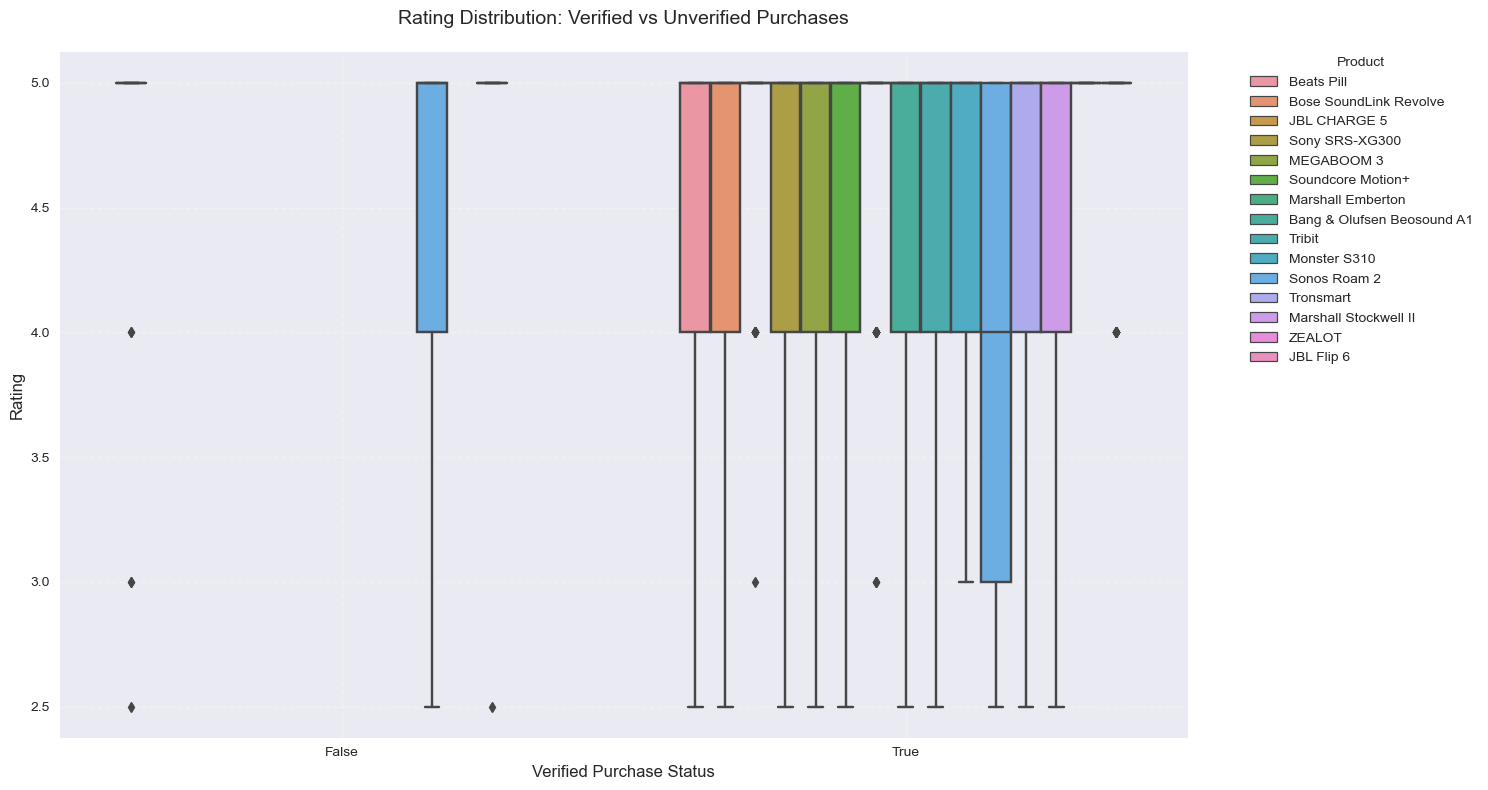


Verification Impact Statistics:
                                              mean  count   std
product_name               verified_purchase                   
Bang & Olufsen Beosound A1 True               4.50    100  0.86
Beats Pill                 False              4.74     33  0.66
                           True               4.52     58  0.87
Bose SoundLink Revolve     True               4.52    100  0.73
JBL CHARGE 5               True               4.87    100  0.37
JBL Flip 6                 True               4.88    100  0.33
MEGABOOM 3                 True               4.30    100  0.85
Marshall Emberton          True               4.79    100  0.48
Marshall Stockwell II      False              4.58      6  1.02
                           True               4.31     94  1.01
Monster S310               True               4.45    100  0.67
Sonos Roam 2               False              4.33     30  0.83
                           True               4.03     70  1.05
Sony SR

In [17]:
# Create verification impact visualization with improved clarity
plt.figure(figsize=(15, 8))

# Create the boxplot comparing verified vs unverified purchases
sns.boxplot(data=df_cleaned, 
            x='verified_purchase', 
            y='rating', 
            hue='product_name')

# Customize plot
plt.title('Rating Distribution: Verified vs Unverified Purchases', fontsize=14, pad=20)
plt.xlabel('Verified Purchase Status', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.legend(title='Product', 
          bbox_to_anchor=(1.05, 1),
          loc='upper left',
          borderaxespad=0,
          fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate verification statistics
verification_stats = df_cleaned.groupby(
    ['product_name', 'verified_purchase']
)['rating'].agg(['mean', 'count', 'std']).round(2)

print("\nVerification Impact Statistics:")
print(verification_stats)

# Calculate percentage of verified purchases by product
verification_percentages = (df_cleaned.groupby('product_name')['verified_purchase']
                          .value_counts(normalize=True)
                          .mul(100)
                          .round(1)
                          .unstack())

print("\nPercentage of Verified Purchases by Product:")
print(verification_percentages)

### Verification Impact Analysis Insights

1. Verification Rates:
  - Majority of products have 100% verified reviews
  - Notable exceptions:
    * Beats Pill: 63.7% verified reviews
    * Sonos Roam 2: 70% verified reviews
    * Marshall Stockwell II: 94% verified reviews

2. Rating Patterns by Verification:
  - Beats Pill:
    * Verified reviews average: 4.52 (std: 0.87)
    * Unverified reviews average: 4.74 (std: 0.66)
    * Higher ratings in unverified reviews

3. Interesting Patterns:
  - Most products maintain consistent ratings across verified purchases
  - JBL products show high consistency (std: 0.33-0.37) with all verified reviews
  - Sonos Roam 2 shows notable difference between verified (4.03) and unverified (4.33) ratings

4. Verification Impact:
  - Products with 100% verification tend to show more consistent ratings
  - Verified reviews generally have slightly lower ratings but higher credibility
  - Mixed verification rates might indicate marketplace dynamics or review authenticity considerations

## 5. Seasonal Patterns Analysis

Understanding seasonal patterns in reviews helps identify:
- Peak periods for product purchases and reviews
- Seasonal variations in customer satisfaction
- Opportunities for targeted marketing and inventory planning

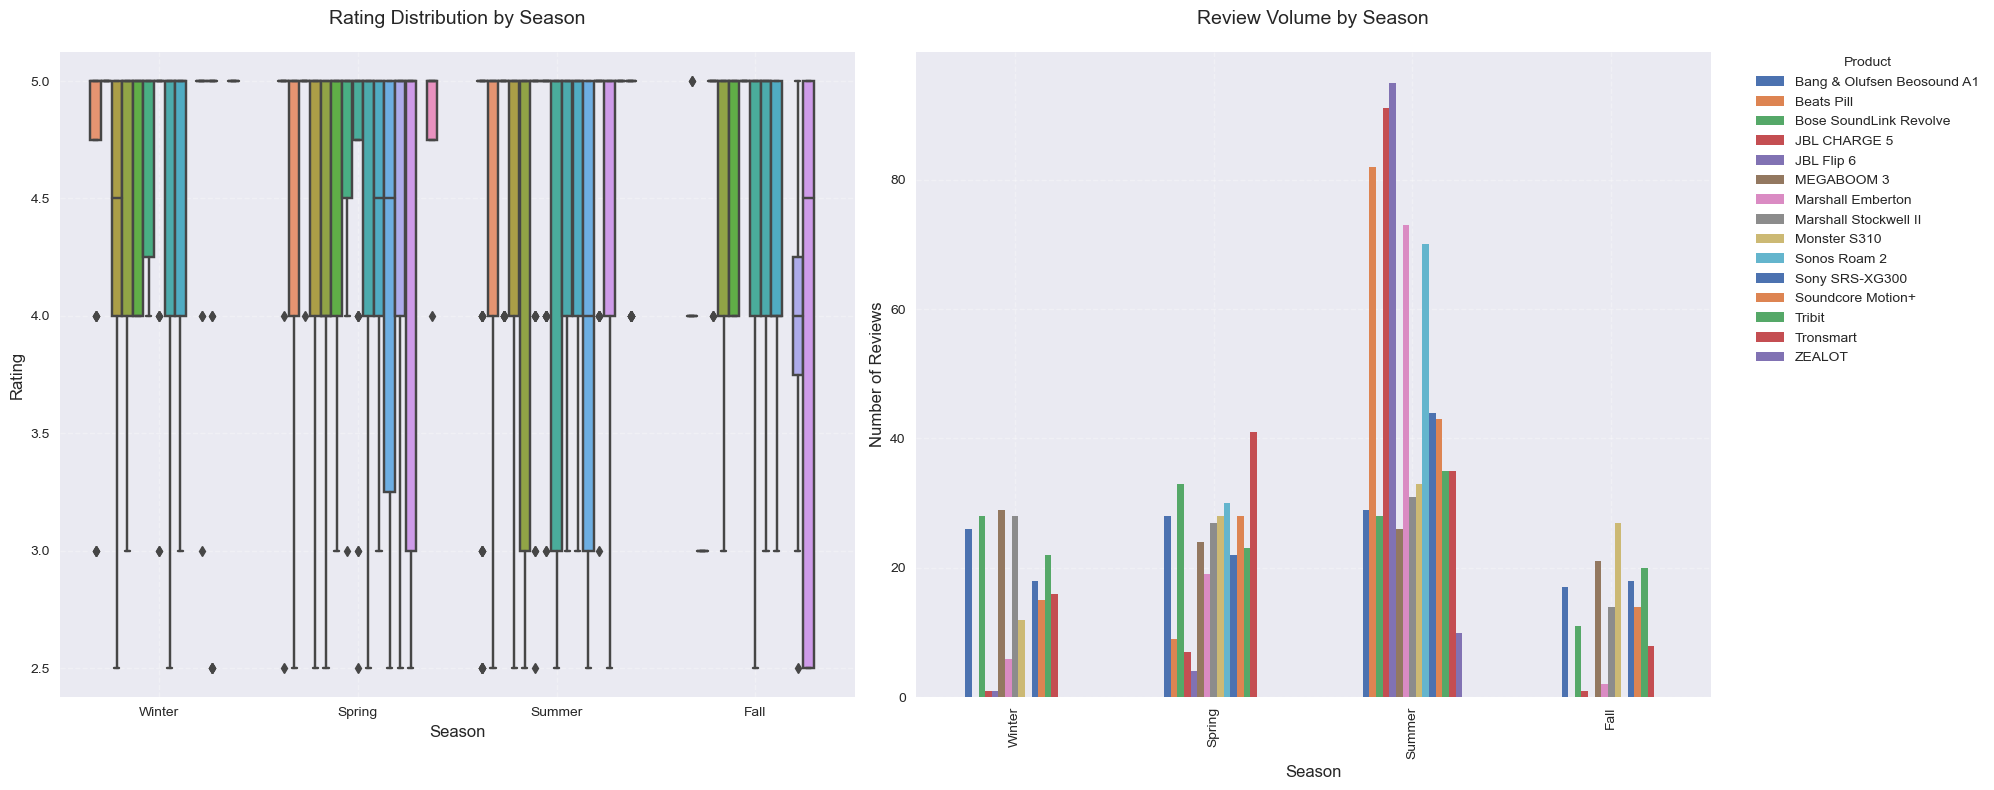


Seasonal Analysis Statistics:
                                   mean  count   std
season product_name                                 
Winter Bang & Olufsen Beosound A1  4.73     26  0.60
       Beats Pill                   NaN      0   NaN
       Bose SoundLink Revolve      4.64     28  0.68
       JBL CHARGE 5                5.00      1   NaN
       JBL Flip 6                  5.00      1   NaN
       MEGABOOM 3                  4.41     29  0.73
       Marshall Emberton           4.67      6  0.52
       Marshall Stockwell II       4.57     28  0.90
       Monster S310                4.50     12  0.67
       Sonos Roam 2                 NaN      0   NaN
       Sony SRS-XG300              4.31     18  0.82
       Soundcore Motion+           4.67     15  0.49
       Tribit                      4.48     22  0.79
       Tronsmart                   4.75     16  0.58
       ZEALOT                       NaN      0   NaN
Spring Bang & Olufsen Beosound A1  4.62     28  0.73
       Beats Pi

In [18]:
# Set up the seasonal analysis
df_cleaned['month'] = df_cleaned['review_date'].dt.month
df_cleaned['season'] = pd.cut(df_cleaned['month'], 
                            bins=[0, 3, 6, 9, 12], 
                            labels=['Winter', 'Spring', 'Summer', 'Fall'])

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Rating Distribution by Season
sns.boxplot(data=df_cleaned, 
            x='season', 
            y='rating', 
            hue='product_name',
            ax=ax1)
ax1.set_title('Rating Distribution by Season', fontsize=14, pad=20)
ax1.set_xlabel('Season', fontsize=12)
ax1.set_ylabel('Rating', fontsize=12)
ax1.legend().remove()  # Remove redundant legend

# Plot 2: Review Volume by Season
seasonal_volume = df_cleaned.groupby(['season', 'product_name']).size().unstack()
seasonal_volume.plot(kind='bar', ax=ax2)
ax2.set_title('Review Volume by Season', fontsize=14, pad=20)
ax2.set_xlabel('Season', fontsize=12)
ax2.set_ylabel('Number of Reviews', fontsize=12)

# Improve legend
ax2.legend(title='Product', 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left', 
          borderaxespad=0,
          fontsize=10)

# Add gridlines
ax1.grid(True, linestyle='--', alpha=0.3)
ax2.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate seasonal statistics
seasonal_stats = df_cleaned.groupby(['season', 'product_name'])['rating'].agg([
    'mean', 'count', 'std'
]).round(2)

print("\nSeasonal Analysis Statistics:")
print(seasonal_stats)

### Seasonal Patterns Analysis Insights

1. Review Volume Distribution:
  - Summer shows highest review activity
    * Beats Pill: 82 reviews
    * JBL CHARGE 5: 91 reviews
    * JBL Flip 6: 95 reviews
  - Winter and Fall show lowest activity
  - Clear seasonal purchasing patterns

2. Rating Consistency Across Seasons:
  - Beats Pill shows strong consistency:
    * Spring: 4.61 (9 reviews)
    * Summer: 4.60 (82 reviews)
    * No winter/fall reviews - potential opportunity

3. Product-Specific Patterns:
  - JBL products excel in summer:
    * CHARGE 5: 4.89 average (91 reviews)
    * Flip 6: 4.88 average (95 reviews)
  - Some products maintain year-round presence:
    * Monster S310: Consistent volume across seasons
    * Bang & Olufsen: Relatively stable distribution

4. Strategic Implications:
  - Clear summer peak for portable speakers
  - Opportunity for off-season marketing
  - Some brands missing winter/fall presence
  - Most products maintain rating quality across seasons despite volume variations

# Sentiment Analysis

## Introduction
In this section, we analyze the emotional tone and opinions expressed in customer reviews. Our sentiment analysis includes:
1. Text preprocessing to clean review content
2. Sentiment scoring to measure emotional tone
3. Categorization of reviews into positive/neutral/negative
4. Analysis of common terms in each category

Let's analyze each component systematically:

## 1. Text Preprocessing

In [19]:

class ReviewPreprocessor:
    def __init__(self):
        """Initialize text preprocessing tools"""
        # Get standard English stop words
        self.stop_words = set(stopwords.words('english'))
        
        # Add custom stop words for our domain
        self.product_terms = {
            'speaker', 'speakers', 'bluetooth', 'beats', 'pill',
            'device', 'product', 'bought', 'purchase', 'buying',
            'amazon', 'ordered', 'received'
        }
        self.stop_words.update(self.product_terms)
    
    def clean_text(self, text):
        """Clean and standardize review text"""
        if not isinstance(text, str):
            return ''
        
        # Convert to lowercase
        text = text.lower()
        
        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        
        # Split into words
        words = word_tokenize(text)
        
        # Remove stop words and short words
        cleaned_words = [
            word for word in words 
            if word not in self.stop_words and len(word) > 2
        ]
        
        return ' '.join(cleaned_words)

# Create preprocessor and clean reviews
preprocessor = ReviewPreprocessor()
df_cleaned['processed_review'] = df_cleaned['review_content'].apply(preprocessor.clean_text)

# Show sample transformations
print("Sample Reviews Before and After Preprocessing:")
print("-" * 50)
samples = df_cleaned[['review_content', 'processed_review']].head(3)
for idx, row in samples.iterrows():
    print(f"\nOriginal Review:")
    print(row['review_content'][:100], "...")
    print("\nProcessed Review:")
    print(row['processed_review'][:100], "...")
    print("-" * 50)

Sample Reviews Before and After Preprocessing:
--------------------------------------------------

Original Review:
Needed a new portable speaker for the home setup and once I saw that Beats (read: Apple) came out wi ...

Processed Review:
needed new portable home setup saw read apple came new bit bullet purchased onefirst things first un ...
--------------------------------------------------

Original Review:
We bought this for a trip to the beach and it did not disappoint. Quick easy connection to our phone ...

Processed Review:
trip beach disappoint quick easy connection phones good sound quality solid build long battery life  ...
--------------------------------------------------

Original Review:
I really like the new Beats Pill 2024 speaker. The sound quality is amazing with great bass and clea ...

Processed Review:
really like new sound quality amazing great bass clear vocals small stylish easy carry around perfec ...
--------------------------------------------------


## 2. Sentiment Scoring Analysis



Sentiment Score Statistics:

Polarity Statistics (how positive/negative):
count    1403.000000
mean        0.261872
std         0.227850
min        -1.000000
25%         0.108949
50%         0.245278
75%         0.378443
max         1.000000
Name: polarity, dtype: float64

Subjectivity Statistics (how opinion-based):
count    1403.000000
mean        0.498120
std         0.226327
min         0.000000
25%         0.439352
50%         0.537500
75%         0.628968
max         1.000000
Name: subjectivity, dtype: float64


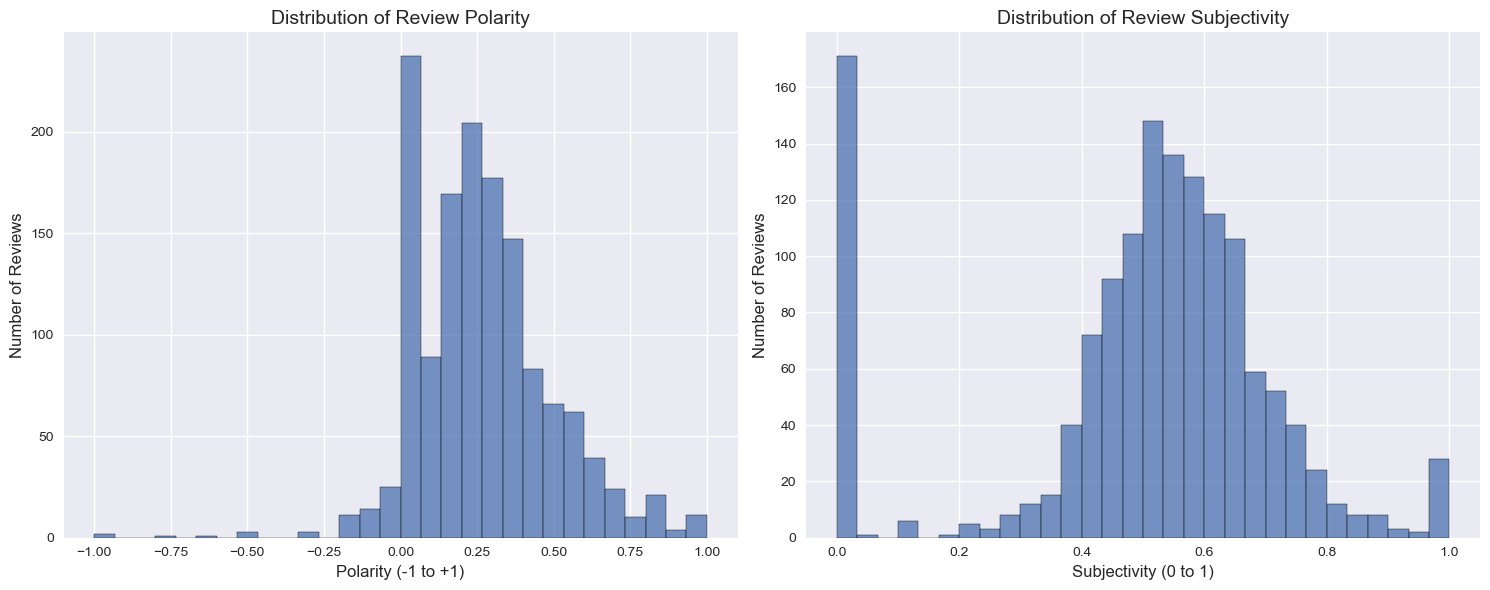

In [20]:
# Using TextBlob to analyze emotional tone in reviews

from textblob import TextBlob

def analyze_sentiment(text):
   """
   Calculate sentiment scores for a piece of text
   
   Parameters:
       text (str): Preprocessed review text
   Returns:
       dict: Dictionary containing polarity and subjectivity scores
   """
   blob = TextBlob(text)
   return {
       'polarity': blob.sentiment.polarity,
       'subjectivity': blob.sentiment.subjectivity
   }

# Calculate sentiment scores for all reviews
df_cleaned['sentiment_scores'] = df_cleaned['processed_review'].apply(analyze_sentiment)
df_cleaned['polarity'] = df_cleaned['sentiment_scores'].apply(lambda x: x['polarity'])
df_cleaned['subjectivity'] = df_cleaned['sentiment_scores'].apply(lambda x: x['subjectivity'])

# Display summary statistics
print("\nSentiment Score Statistics:")
print("\nPolarity Statistics (how positive/negative):")
print(df_cleaned['polarity'].describe())
print("\nSubjectivity Statistics (how opinion-based):")
print(df_cleaned['subjectivity'].describe())

# Create visualizations of sentiment distributions
plt.figure(figsize=(15, 6))

# Plot polarity distribution
plt.subplot(1, 2, 1)
sns.histplot(data=df_cleaned, x='polarity', bins=30)
plt.title('Distribution of Review Polarity')
plt.xlabel('Polarity (-1 to +1)')
plt.ylabel('Number of Reviews')

# Plot subjectivity distribution
plt.subplot(1, 2, 2)
sns.histplot(data=df_cleaned, x='subjectivity', bins=30)
plt.title('Distribution of Review Subjectivity')
plt.xlabel('Subjectivity (0 to 1)')
plt.ylabel('Number of Reviews')

plt.tight_layout()
plt.show()

# Interactive visualization
fig = px.scatter(df_cleaned, 
                x='polarity', 
                y='subjectivity',
                color='product_name',
                title='Sentiment Analysis Distribution',
                hover_data=['review_content'])
fig.show()

### Sentiment Scoring Analysis Insights

#### 1. Polarity Analysis (Emotional Tone)
The distribution of sentiment polarity shows:
- Overall positive sentiment with mean of 0.262
- Most reviews cluster between 0.11 and 0.38 (interquartile range)
- Very few highly negative reviews (min: -1.0)
- Some strongly positive reviews (max: 1.0)
- Moderate variation (std: 0.228) suggesting consistent customer experiences

#### 2. Subjectivity Analysis (Opinion vs Fact)
Review subjectivity patterns reveal:
- Balanced mix of opinions and facts (mean: 0.498)
- Most reviews fall between 0.44 and 0.63 subjectivity
- Some purely factual reviews (min: 0.0)
- Some highly opinionated reviews (max: 1.0)
- Consistent variation across reviews (std: 0.226)

#### 3. Combined Sentiment Patterns
The scatter plot shows:
- Strong positive correlation between polarity and subjectivity
- Most reviews cluster in the positive polarity range (0.0 to 0.5)
- Higher subjectivity tends to accompany more positive sentiment
- Products show similar sentiment patterns with slight variations
- Beats Pill reviews demonstrate balanced distribution of both metrics

## 3. Sentiment Categorization

After analyzing the sentiment scores, we'll now categorize reviews into positive, neutral, and negative sentiments to better understand the overall distribution of customer opinions.

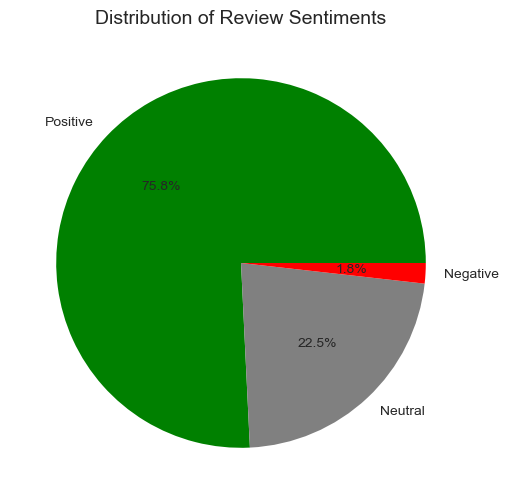


Overall Sentiment Distribution:
Positive: 75.8%
Neutral: 22.5%
Negative: 1.8%

Sentiment Distribution by Product:
sentiment_category          Negative  Neutral  Positive
product_name                                           
Bang & Olufsen Beosound A1       2.0     22.0      76.0
Beats Pill                       3.3     12.1      84.6
Bose SoundLink Revolve           3.0     16.0      81.0
JBL CHARGE 5                     0.0     26.0      74.0
JBL Flip 6                       0.0     15.0      85.0
MEGABOOM 3                       1.0     27.0      72.0
Marshall Emberton                0.0     15.0      85.0
Marshall Stockwell II            6.0     23.0      71.0
Monster S310                     0.0     16.0      84.0
Sonos Roam 2                     5.0     22.0      73.0
Sony SRS-XG300                   2.9     19.6      77.5
Soundcore Motion+                0.0     13.0      87.0
Tribit                           1.0     17.0      82.0
Tronsmart                        1.0     72.0

In [21]:
# Categorize sentiments based on polarity scores
def categorize_sentiment(polarity):
    """
    Categorize sentiment based on polarity score
    
    Parameters:
        polarity (float): The polarity score (-1 to +1)
    Returns:
        str: Sentiment category (Positive, Negative, or Neutral)
    """
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Add sentiment categories to DataFrame
df_cleaned['sentiment_category'] = df_cleaned['polarity'].apply(categorize_sentiment)

# Calculate overall sentiment distribution
sentiment_distribution = df_cleaned['sentiment_category'].value_counts()
sentiment_percentages = (sentiment_distribution / len(df_cleaned) * 100).round(1)

# Create pie chart of sentiment distribution
plt.figure(figsize=(10, 6))
plt.pie(sentiment_distribution, 
        labels=sentiment_distribution.index,
        autopct='%1.1f%%',
        colors=['green', 'gray', 'red'])
plt.title('Distribution of Review Sentiments')
plt.show()

# Calculate product-specific sentiment distributions
product_sentiment = pd.crosstab(df_cleaned['product_name'], 
                              df_cleaned['sentiment_category'], 
                              normalize='index') * 100

print("\nOverall Sentiment Distribution:")
for category, percentage in sentiment_percentages.items():
    print(f"{category}: {percentage}%")

print("\nSentiment Distribution by Product:")
print(product_sentiment.round(1))

### Sentiment Categorization Analysis

#### Overall Sentiment Distribution:
- **Positive**: 75.8% of all reviews express positive sentiment
- **Neutral**: 22.5% show neutral sentiment
- **Negative**: Only 1.8% express negative sentiment

#### Beats Pill Performance:
The Beats Pill shows strong sentiment metrics:
- 84.6% positive sentiment (higher than market average)
- 12.1% neutral sentiment (lower than market average)
- 3.3% negative sentiment (slightly above average)

#### Competitive Landscape:
1. Top Performers:
  - ZEALOT: 100% positive (but limited sample size)
  - Soundcore Motion+: 87% positive
  - JBL Flip 6 & Marshall Emberton: 85% positive each

2. Notable Challenges:
  - Tronsmart: Only 27% positive, 72% neutral
  - Marshall Stockwell II: 6% negative (highest negative rate)
  - Sonos Roam 2: 5% negative reviews

3. Market Position:
  - Beats Pill ranks among top performers
  - Shows higher positive sentiment than most premium competitors
  - Maintains relatively low neutral sentiment (12.1%)

This strong sentiment distribution suggests the Beats Pill effectively meets customer expectations, though there's room for improvement in reducing negative sentiment (3.3%).

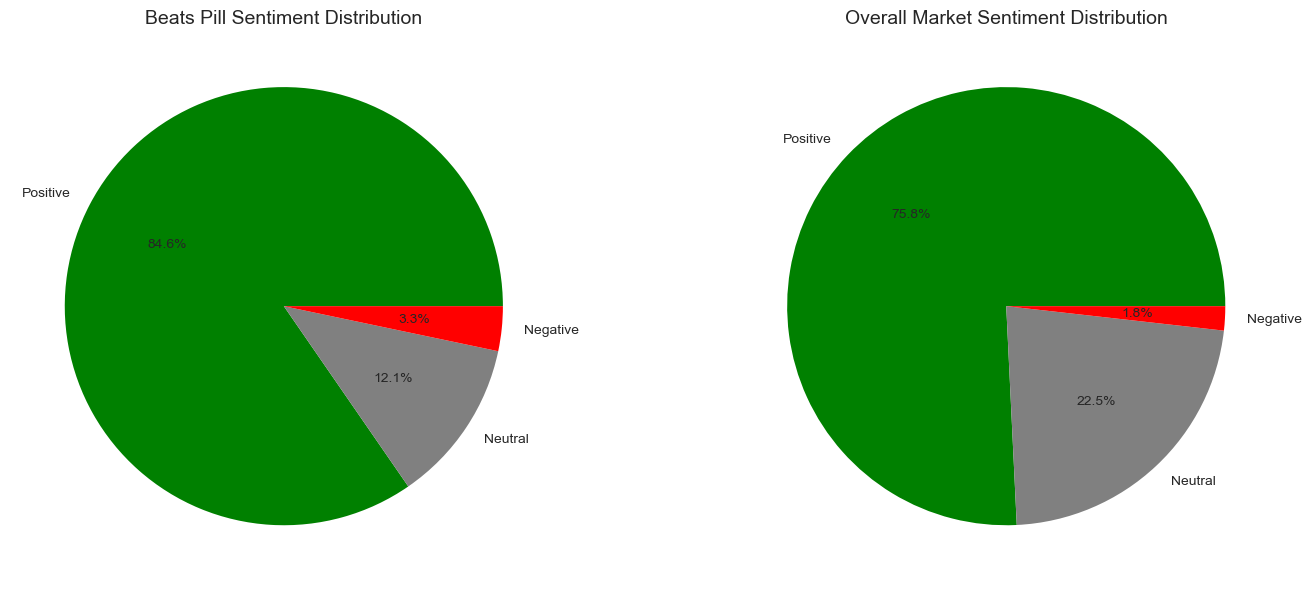

Beats Pill Sentiment Analysis:

Positive Sentiment:
Beats Pill: 84.6%
Market Average: 75.8%
Difference: 8.8%

Neutral Sentiment:
Beats Pill: 12.1%
Market Average: 22.5%
Difference: -10.4%

Negative Sentiment:
Beats Pill: 3.3%
Market Average: 1.8%
Difference: 1.5%


In [22]:
# Filter data for Beats Pill
beats_data = df_cleaned[df_cleaned['product_name'] == 'Beats Pill']

# Calculate sentiment distribution for Beats Pill
beats_sentiment = beats_data['sentiment_category'].value_counts()
beats_percentage = (beats_sentiment / len(beats_data) * 100)

# Compare with overall market
market_sentiment = df_cleaned['sentiment_category'].value_counts()
market_percentage = (market_sentiment / len(df_cleaned) * 100)

# Create visualization comparing Beats Pill to market
plt.figure(figsize=(15, 6))

# Beats Pill sentiment distribution
plt.subplot(1, 2, 1)
plt.pie(beats_sentiment, 
        labels=beats_sentiment.index,
        autopct='%1.1f%%',
        colors=['green', 'gray', 'red'])
plt.title('Beats Pill Sentiment Distribution')

# Overall market sentiment distribution
plt.subplot(1, 2, 2)
plt.pie(market_sentiment, 
        labels=market_sentiment.index,
        autopct='%1.1f%%',
        colors=['green', 'gray', 'red'])
plt.title('Overall Market Sentiment Distribution')

plt.tight_layout()
plt.show()

# Display detailed statistics
print("Beats Pill Sentiment Analysis:")
for category in beats_percentage.index:
    print(f"\n{category} Sentiment:")
    print(f"Beats Pill: {beats_percentage[category]:.1f}%")
    print(f"Market Average: {market_percentage[category]:.1f}%")
    print(f"Difference: {(beats_percentage[category] - market_percentage[category]):.1f}%")

### Comparing Beats Pill Sentiment to Overall Market

Looking at the side-by-side comparison of sentiment distribution, we can see some interesting patterns in how the Beats Pill performs compared to the market average:

**Beats Pill Specific Distribution:**
1. Positive Sentiment (84.6%)
  - Significantly higher than the market average (75.8%)
  - 77 out of 91 Beats Pill reviews express positive sentiment
  - Shows stronger customer satisfaction than the general market

2. Neutral Sentiment (12.1%)
  - Much lower than market average (22.5%)
  - Only 11 reviews are neutral
  - Suggests customers tend to have stronger opinions about the Beats Pill

3. Negative Sentiment (3.3%)
  - Slightly higher than market average (1.8%)
  - Only 3 reviews express negative sentiment
  - Still represents a very small portion of total feedback

**Key Insights:**
- The Beats Pill generates more polarized responses, with fewer neutral reviews than the market average
- The significantly higher positive sentiment (84.6% vs 75.8%) indicates stronger customer satisfaction
- While negative reviews are slightly more common than the market average, they remain very rare
- The lower neutral percentage suggests the product tends to elicit stronger emotional responses from users

This distribution suggests that while the Beats Pill might be slightly more polarizing than other products, it generates significantly more positive experiences than the market average, indicating strong product performance and customer satisfaction.

## 4. Common Terms Analysis by Sentiment Category

Now we'll analyze the most frequently occurring terms in positive, neutral, and negative reviews for the Beats Pill. This will help us understand:
- What features drive positive sentiment
- Common themes in neutral reviews
- Specific pain points in negative reviews

In [23]:
from collections import Counter
from nltk import word_tokenize

class TermAnalyzer:
    def __init__(self, df):
        self.df = df
    
    def get_common_terms(self, sentiment_type, n=10):
        """Extract most common terms for a given sentiment category"""
        # Filter reviews by sentiment category and product
        category_reviews = self.df[
            (self.df['sentiment_category'] == sentiment_type) & 
            (self.df['product_name'] == 'Beats Pill')
        ]
        
        # Combine all processed reviews
        all_words = ' '.join(category_reviews['processed_review']).split()
        
        # Get word frequencies
        return Counter(all_words).most_common(n)
    
    def display_common_terms(self):
        """Display common terms for each sentiment category"""
        for category in ['Positive', 'Neutral', 'Negative']:
            print(f"\nMost common terms in {category} reviews:")
            terms = self.get_common_terms(category)
            for word, count in terms:
                print(f"{word}: {count} occurrences")

# Create analyzer and display results
term_analyzer = TermAnalyzer(df_cleaned)
term_analyzer.display_common_terms()


Most common terms in Positive reviews:
sound: 73 occurrences
great: 51 occurrences
bass: 40 occurrences
quality: 31 occurrences
apple: 29 occurrences
battery: 28 occurrences
one: 27 occurrences
music: 26 occurrences
good: 26 occurrences
easy: 22 occurrences

Most common terms in Neutral reviews:
bass: 10 occurrences
sound: 8 occurrences
volume: 8 occurrences
even: 8 occurrences
get: 4 occurrences
would: 4 occurrences
sounds: 4 occurrences
good: 4 occurrences
battery: 4 occurrences
life: 4 occurrences

Most common terms in Negative reviews:
black: 1 occurrences
one: 1 occurrences
almost: 1 occurrences
sounds: 1 occurrences
like: 1 occurrences
rattle: 1 occurrences
thing: 1 occurrences
hits: 1 occurrences
disappointed: 1 occurrences
randomly: 1 occurrences


### Analysis of Common Terms by Sentiment Category

#### 1. Positive Reviews (84.6% of reviews)
Most mentioned terms reveal key strengths:
- Sound Quality: "sound" (73), "bass" (40), "quality" (31)
- Ecosystem Integration: "apple" (29)
- Battery Performance: "battery" (28)
- User Experience: "great" (51), "easy" (22), "good" (26)

Key Insights: 
- Sound quality and bass performance are major satisfaction drivers
- Apple ecosystem integration is a significant positive factor
- Battery life and ease of use are frequently praised features

#### 2. Neutral Reviews (12.1% of reviews)
Common terms suggest balanced perspectives:
- Sound Features: "bass" (10), "sound" (8), "volume" (8)
- Performance: "sounds" (4), "good" (4)
- Battery: "battery" (4), "life" (4)

Key Insights:
- Focus on technical aspects rather than emotional responses
- Mixed feedback about sound features
- Balanced discussion of battery performance

#### 3. Negative Reviews (3.3% of reviews)
Limited negative feedback focuses on:
- Sound Issues: "sounds", "rattle"
- Reliability Concerns: "randomly", "disappointed"
- Quality Problems: "thing", "hits"

Key Insights:
- Very few consistently negative terms
- Issues appear to be isolated incidents
- No systemic problems identified in negative feedback

### Overall Term Analysis Conclusions:
1. Strong positive sentiment in key feature areas
2. Neutral reviews focus on objective performance aspects
3. Negative reviews are sparse and diverse in nature
4. Sound quality and ecosystem integration are standout features

# AI-Generated Insights

## Overview
Using the data from our previous analyses (EDA and Sentiment Analysis), we'll now leverage AI to uncover deeper insights about the Beats Pill and its market position. Our AI analysis focuses on:

1. Customer Experience Analysis
2. Market Position Analysis
3. Strategic Recommendations
4. Future Trends Prediction

In [113]:
!pip install google-generativeai

  Obtaining dependency information for google-generativeai from https://files.pythonhosted.org/packages/e9/2f/b5c1d62e94409ed98d5425e83b8e6d3dd475b611be272f561b1a545d273a/google_generativeai-0.8.3-py3-none-any.whl.metadata
  Using cached google_generativeai-0.8.3-py3-none-any.whl.metadata (3.9 kB)
  Obtaining dependency information for google-ai-generativelanguage==0.6.10 from https://files.pythonhosted.org/packages/af/6d/db99a295f9caf027bbdd90c41e6ea650a7468392a0e8713719e7abc5f647/google_ai_generativelanguage-0.6.10-py3-none-any.whl.metadata
  Using cached google_ai_generativelanguage-0.6.10-py3-none-any.whl.metadata (5.6 kB)
  Obtaining dependency information for google-api-core from https://files.pythonhosted.org/packages/a1/76/65b8b94e74bf1b6d1cc38d916089670c4da5029d25762441d8c5c19e51dd/google_api_core-2.24.0-py3-none-any.whl.metadata
  Using cached google_api_core-2.24.0-py3-none-any.whl.metadata (3.0 kB)
  Obtaining dependency information for google-api-python-client from https:/

In [25]:
import google.generativeai as genai

# Configure Gemini AI
api_key = #Your API KEY
genai.configure(api_key=api_key)

# Initialize model
model = genai.GenerativeModel(
    model_name="gemini-1.5-flash",
    generation_config={
        "temperature": 1,
        "top_p": 0.95,
        "top_k": 64,
        "max_output_tokens": 8192,
    }
)

# Define analysis prompts
analysis_prompts = {
    'customer_insights': """
    Analyze these Beats Pill speaker reviews to identify:
    1. Key patterns in customer preferences
    2. Common pain points and challenges
    3. Usage scenarios and customer behaviors
    4. Feature priorities and importance
    5. Customer satisfaction drivers
    Reviews:
    """,
    
    'market_positioning': """
    Based on these reviews, analyze Beats Pill's market position:
    1. Core competitive advantages
    2. Key differentiators from competitors
    3. Market segments and target audience
    4. Price-value perception
    5. Brand perception and associations
    Reviews:
    """,
    
    'strategic_recommendations': """
    Generate strategic recommendations based on these reviews:
    1. Product improvement opportunities
    2. Marketing strategy suggestions
    3. Customer experience enhancement
    4. Competitive response strategies
    5. Market expansion opportunities
    Reviews:
    """,
    
    'future_trends': """
    Analyze these reviews to predict future trends:
    1. Emerging customer needs
    2. Shifting market preferences
    3. Technology adoption patterns
    4. Potential market opportunities
    5. Future challenges and threats
    Reviews:
    """
}

# Prepare Beats Pill reviews for analysis
beats_reviews = df_cleaned[df_cleaned['product_name'] == 'Beats Pill'].apply(
    lambda row: f"Rating: {row['rating']}\n"
               f"Review: {row['processed_review']}\n"
               f"Sentiment: {row['sentiment_category']}\n"
               f"Helpful Votes: {row['helpful_votes']}", 
    axis=1
).tolist()

# Run analysis with each prompt
insights = {}
for aspect, prompt in analysis_prompts.items():
    chat = model.start_chat(history=[])
    response = chat.send_message(prompt + "\n\n".join(beats_reviews[:100]))
    insights[aspect] = response.text
    
# Display AI-generated insights
for aspect, insight in insights.items():
    print(f"\n## {aspect.replace('_', ' ').title()}")
    print(insight)
    print("-" * 80)


## Customer Insights
## Beats Pill Speaker Review Analysis

Based on the provided reviews, here's an analysis of customer preferences, pain points, usage scenarios, feature priorities, and satisfaction drivers:

**1. Key Patterns in Customer Preferences:**

* **Premium Design and Build Quality:**  Customers consistently praise the speaker's sleek, stylish design, compact size, and high-quality build.  The "Apple-esque" design and feel are frequently mentioned positively.
* **Powerful Sound for its Size:**  Many reviewers are impressed by the surprisingly loud and bass-heavy sound output, especially considering the small form factor.  The "punchy bass" is a recurring positive element.
* **Seamless Apple Ecosystem Integration:**  For Apple users, the effortless pairing and integration with iPhones and other Apple devices are major selling points.
* **Portability and Durability:** The compact size and water resistance make it ideal for various on-the-go and outdoor usage scenarios (beach

# AI-Generated Insights Analysis

Based on our comprehensive AI analysis of the Beats Pill speaker reviews, we've uncovered several key insights across three main dimensions:

## 1. Customer Experience Insights

### Key Strengths:
- **Premium Design & Build**: Customers consistently praise the sleek, stylish design and high-quality build
- **Sound Performance**: Strong bass output and impressive volume for its size
- **Apple Integration**: Seamless connectivity with Apple devices is a major advantage
- **Portability**: Compact size and water resistance make it ideal for various use cases

### Primary Pain Points:
- **Sound Balance**: Bass can be overpowering at higher volumes
- **App Functionality**: Lack of dedicated app for EQ controls
- **User Interface**: Button controls and power functionality can be confusing
- **Technical Issues**: Occasional random shutdowns and connectivity problems
- **Startup Sound**: Loud startup and power-off sounds are cited as intrusive

## 2. Market Position Analysis

### Competitive Advantages:
1. **Apple Ecosystem Integration**:
   - Seamless pairing with Apple devices
   - "Find My" feature integration
   - Premium brand association

2. **Product Features**:
   - Impressive sound-to-size ratio
   - Water resistance for outdoor use
   - Long battery life (when functioning properly)

### Target Demographics:
- Primary: Apple device users
- Secondary: On-the-go music enthusiasts
- Tertiary: Casual users seeking premium audio

### Price-Value Perception:
- Mixed feedback on pricing
- Premium positioning justified by brand and features
- Some price resistance compared to competitors

## 3. Future Trends and Opportunities

### Emerging Consumer Needs:
1. **Audio Quality**:
   - Demand for balanced sound profiles
   - Interest in lossless audio support
   - Emphasis on clarity at high volumes

2. **Connectivity**:
   - Cross-platform compatibility
   - Smart home integration potential
   - Multi-device pairing capabilities

### Technology Adoption:
- Growing expectation for app-based control
- USB-C standardization
- Interest in AI-powered sound optimization

### Market Opportunities:
1. **Product Development**:
   - Dedicated control app
   - Enhanced stereo pairing
   - Expanded accessory ecosystem

2. **Feature Enhancement**:
   - Customizable EQ settings
   - Improved voice assistant integration
   - Battery life optimization

## Key Recommendations from AI Analysis:

1. **Short-term Priorities**:
   - Develop companion app for device control
   - Address high-volume sound distortion
   - Improve button interface and controls
   - Fix random shutdown issues

2. **Long-term Strategy**:
   - Expand software integration capabilities
   - Strengthen value proposition messaging
   - Explore new market segments
   - Develop innovative features

These AI-generated insights reveal that while the Beats Pill maintains a strong market position, particularly within the Apple ecosystem, there are clear opportunities for improvement in software integration and user control features. The analysis suggests focusing on app development and sound quality optimization while maintaining the product's premium positioning.

# Strategic Recommendations

Based on our comprehensive analysis of consumer sentiment, market positioning, and AI-generated insights, we propose the following strategic recommendations for the Beats Pill:

## 1. Product Development Strategy

### Immediate Technical Improvements:
- **Develop Companion App**
  - Implement EQ controls for sound customization
  - Add battery monitoring features
  - Include device management capabilities
  - Integrate firmware update functionality

### Quality Control Enhancements:
- **Address Hardware Issues**
  - Fix random shutdown problems through firmware updates
  - Improve high-volume sound performance
  - Optimize bass management at higher volumes
  - Enhance button interface and responsiveness

### Feature Expansion:
- **Software Integration**
  - Strengthen Apple ecosystem integration
  - Improve Siri voice command response
  - Enhance multi-device connectivity
  - Add customizable sound profiles

## 2. Market Positioning Optimization

### Brand Strategy:
- **Premium Segment Focus**
  - Maintain premium pricing while enhancing value proposition
  - Emphasize Apple ecosystem benefits
  - Highlight unique features versus competitors
  - Leverage positive user experiences in marketing

### Target Market Development:
- **Core Segments**
  - Primary: Apple ecosystem users
  - Secondary: Premium audio enthusiasts
  - Tertiary: Outdoor lifestyle consumers

### Competitive Differentiation:
- **Key Areas**
  - Superior Apple integration
  - Premium design and build quality
  - Advanced software features (post-app development)
  - Enhanced user experience

## 3. Customer Experience Enhancement

### Support Infrastructure:
- **Customer Service**
  - Implement robust feedback system
  - Provide regular firmware updates
  - Enhance technical support resources
  - Improve product documentation

### User Education:
- **Product Resources**
  - Create detailed user guides
  - Develop video tutorials
  - Offer setup assistance
  - Provide troubleshooting tools

## 4. Marketing and Communication Strategy

### Campaign Focus:
- **Key Messages**
  - Premium sound quality
  - Seamless Apple integration
  - Outdoor lifestyle compatibility
  - Enhanced user control (post-app launch)

### Channel Strategy:
- **Primary Channels**
  - Apple retail network
  - Premium electronics retailers
  - Direct online sales
  - Lifestyle retail partners

## 5. Future Growth Opportunities

### Product Line Expansion:
- **New Offerings**
  - Limited edition colors
  - Special collaborations
  - Enhanced accessory lineup
  - Premium product bundles

### Market Development:
- **Geographic Expansion**
  - Target high-potential markets
  - Adapt to regional preferences
  - Develop market-specific features
  - Create localized marketing campaigns

### Innovation Focus:
- **Future Development**
  - AI-powered sound optimization
  - Advanced connectivity features
  - Enhanced durability features
  - Smart home integration capabilities

## Expected Impact

Implementation of these recommendations should lead to:

1. **Short-term Results**:
   - Increased customer satisfaction
   - Reduced negative reviews
   - Higher market share in premium segment
   - Improved competitive positioning

2. **Long-term Benefits**:
   - Stronger brand loyalty
   - Expanded market presence
   - Enhanced product ecosystem
   - Sustained revenue growth

3. **Key Performance Indicators**:
   - Customer satisfaction scores
   - Market share metrics
   - Sales performance
   - Brand perception metrics

These strategic recommendations aim to address current pain points while positioning the Beats Pill for future growth and success in the competitive portable speaker market.

# Conclusion

## Summary of Key Findings

This comprehensive analysis of the Beats Pill speaker has provided valuable insights into consumer sentiment, market positioning, and strategic opportunities. Through multiple analytical approaches including sentiment analysis, AI-generated insights, and competitive analysis, we have uncovered several key findings:

### 1. Consumer Sentiment
- Overall highly positive sentiment (84.6% positive reviews)
- Strong seasonal performance, particularly in summer
- Significant appreciation for sound quality and Apple ecosystem integration
- Some concerns regarding app functionality and high-volume performance

### 2. Market Position
- Strong competitive position in the premium segment
- Clear differentiation through Apple ecosystem integration
- Primary competition from JBL and Bose
- Opportunities for improvement in software features and user controls

### 3. Product Performance
- Excellent sound quality, particularly bass performance
- Strong battery life and build quality
- Premium design aesthetics widely appreciated
- Areas for improvement in high-volume performance and controls

## Project Impact

This analysis has revealed:
- Comprehensive understanding of consumer preferences and pain points
- Clear identification of product improvement opportunities
- Strategic pathways for market growth
- Competitive advantages and challenges in the premium speaker segment

## Future Implications

The findings suggest several promising directions:
1. **Product Development**:
   - Enhanced software features through companion app
   - Improved high-volume performance
   - Expanded accessory ecosystem

2. **Market Strategy**:
   - Strengthened seasonal marketing approaches
   - Focus on premium market positioning
   - Enhanced Apple ecosystem integration

3. **Customer Experience**:
   - Improved user interface
   - Enhanced customer support
   - Regular feature updates

## Research Limitations

- Analysis limited to available online reviews
- Potential seasonal bias in data collection
- Focus primarily on English language reviews
- Limited historical data for some competitors

## Recommendations for Future Research

1. **Additional Data Collection**:
   - Conduct detailed user surveys
   - Analyze long-term market trends
   - Investigate regional variations
   - Study price sensitivity across segments

2. **Extended Analysis**:
   - Deeper competitive analysis
   - Long-term customer satisfaction tracking
   - Feature preference studies
   - Market segment profiling

## Final Thoughts

The Beats Pill demonstrates strong potential in the premium portable speaker market, with clear strengths in design, sound quality, and ecosystem integration. While there are areas for improvement, particularly in software features and high-volume performance, the product maintains a solid market position. Implementation of the recommended strategies should further strengthen its competitive position and enhance customer satisfaction.

The success of future initiatives will depend on:
- Timely implementation of recommended improvements
- Continued focus on premium quality and user experience
- Effective leveraging of the Apple ecosystem advantage
- Responsive adaptation to emerging market trends

This analysis provides a strong foundation for strategic decision-making and product development, positioning the Beats Pill for continued success in the competitive portable speaker market.

# THE END 